In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Readong the CSV and changing to df
df_ebay = pd.read_csv(r'C:\Users\stephensimpson.CORP\Desktop\Python\eBay.csv', on_bad_lines='skip')

In [7]:
print(df_ebay)

                                        Listing title  eBay item ID  \
0      NEW SEALED 2021 Mosaic Basketball Fat Pack NBA  2.550000e+11   
1   Myles Garrett Browns 2020 Panini Encased GJ-9 ...  2.550000e+11   
2   2010-11 Prestige Stat Stars Materials Patch Je...  2.550000e+11   
3   2011 O-Pee-Chee Materials Malkin Sidney Crosby...  2.550000e+11   
4   Bakugan Sabator/Golden Shot Combat Set Gundali...  2.550000e+11   
..                                                ...           ...   
92  Spyro A Hero's Tail (Nintendo GameCube) CIB CO...  2.560000e+11   
93  Tony Hawk's Underground 2 (Nintendo GameCube) ...  2.560000e+11   
94  Transformers Dark of the Moon Movie Leader Cla...  2.560000e+11   
95  Gray Nintendo 64 N64 Authentic Official Origin...  2.560000e+11   
96  Legend of Zelda: The Wind Waker (GameCube) Com...  2.560000e+11   

    Quantity sold Total sales (Includes taxes) Item sales  \
0               2                      $47.63     $44.38    
1               1        

In [8]:
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 22 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Listing title                                                          97 non-null     object 
 1   eBay item ID                                                           97 non-null     float64
 2   Quantity sold                                                          97 non-null     int64  
 3   Total sales (Includes taxes)                                           97 non-null     object 
 4   Item sales                                                             97 non-null     object 
 5   Taxes and government fees paid by buyer to you                         97 non-null     object 
 6   Taxes and government fees paid by buyer to eBay                        97 non-null     objec

In [9]:
df_ebay.shape

(97, 22)

In [10]:
df_ebay.head()

,Listing title,eBay item ID,Quantity sold,Total sales (Includes taxes),Item sales,Taxes and government fees paid by buyer to you,Taxes and government fees paid by buyer to eBay,Shipping and handling paid by buyer to you,Total selling costs,Insertion fees,...,Promoted Listings Standard fees,Promoted Listings Advanced fees,Promoted Listings Express fees,International fees,Other eBay fees,Deposit processing fees,Fee credits,Shipping labels cost (Amount you paid to buy shipping labels on eBay),Net sales (Net of taxes and selling costs),Average Selling price
0,NEW SEALED 2021 Mosaic Basketball Fat Pack NBA,2.550000e+11,2,$47.63,$44.38,$0.00,$3.25,$0.00,$13.67,$0.00,...,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$7.18,$30.71,$23.82
1,Myles Garrett Browns 2020 Panini Encased GJ-9 ...,2.550000e+11,1,$59.99,$59.99,$0.00,$0.00,$0.00,$11.90,$0.00,...,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$3.86,$48.09,$59.99
2,2010-11 Prestige Stat Stars Materials Patch Je...,2.550000e+11,1,$70.60,$64.99,$0.00,$5.61,$0.00,$12.41,$0.00,...,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$3.39,$52.58,$70.60
3,2011 O-Pee-Chee Materials Malkin Sidney Crosby...,2.550000e+11,1,$37.44,$34.99,$0.00,$2.45,$0.00,$8.71,$0.00,...,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$3.58,$26.28,$37.44
4,Bakugan Sabator/Golden Shot Combat Set Gundali...,2.550000e+11,1,$35.18,$32.99,$0.00,$2.19,$0.00,$8.43,$0.00,...,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$3.79,$24.56,$35.18


In [11]:
#Cleaning column names
df_ebay.columns = df_ebay.columns.str.replace(' ','')
df_ebay.columns = df_ebay.columns.str.replace(' ','_').str.lower()

In [12]:
#Renaming columns
df_ebay = df_ebay.rename(columns={'totalsales(includestaxes)': 'totalsales', 'taxesandgovernmentfeespaidbybuyertoyou': 'buyertaxesandgovtoyou', 'taxesandgovernmentfeespaidbybuyertoebay': 'buyertaxesandgovtoebay','shippinglabelscost(amountyoupaidtobuyshippinglabelsonebay)':'yourshippingcost','netsales(netoftaxesandsellingcosts)':'netsales'})

In [13]:
#dropping columns
to_drop = ['promotedlistingsstandardfees','promotedlistingsadvancedfees', 'promotedlistingsexpressfees', 'optionallistingupgradefees', 'finalvaluefees','insertionfees', 'depositprocessingfees']
df_ebay.drop(to_drop, inplace=True, axis=1)

In [14]:
df_ebay['totalsales'] = df_ebay['totalsales'].replace('\$|,', '', regex=True)
df_ebay['itemsales'] = df_ebay['itemsales'].replace('\$|,', '', regex=True)
df_ebay['buyertaxesandgovtoyou'] = df_ebay['buyertaxesandgovtoyou'].replace('\$|,', '', regex=True)
df_ebay['buyertaxesandgovtoebay'] = df_ebay['buyertaxesandgovtoebay'].replace('\$|,', '', regex=True)
df_ebay['shippingandhandlingpaidbybuyertoyou'] = df_ebay['shippingandhandlingpaidbybuyertoyou'].replace('\$|,', '', regex=True)
df_ebay['totalsellingcosts'] = df_ebay['totalsellingcosts'].replace('\$|,', '', regex=True)
df_ebay['internationalfees'] = df_ebay['internationalfees'].replace('\$|,', '', regex=True)
df_ebay['otherebayfees'] = df_ebay['otherebayfees'].replace('\$|,', '', regex=True)
df_ebay['feecredits'] = df_ebay['feecredits'].replace('\$|,', '', regex=True)
df_ebay['yourshippingcost'] = df_ebay['yourshippingcost'].replace('\$|,', '', regex=True)
df_ebay['averagesellingprice'] = df_ebay['averagesellingprice'].replace('\$|,', '', regex=True)

In [15]:
#Had to change negatives to - for netsales because of a return, wouldn't allow me to make it an int.
df_ebay['netsales'] = df_ebay['netsales'].replace( '[\$,)]','', regex=True )
df_ebay['netsales'] = df_ebay['netsales'].replace( '[(]','-',   regex=True )

In [16]:
#Looking at the data types
print(df_ebay.dtypes)

listingtitle                            object
ebayitemid                             float64
quantitysold                             int64
totalsales                              object
itemsales                               object
buyertaxesandgovtoyou                   object
buyertaxesandgovtoebay                  object
shippingandhandlingpaidbybuyertoyou     object
totalsellingcosts                       object
internationalfees                       object
otherebayfees                           object
feecredits                              object
yourshippingcost                        object
netsales                                object
averagesellingprice                     object
dtype: object


In [17]:
#Cleaning data and creating function to get rid of spaces in data
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in df_ebay.columns:
         
        # checking datatype of each columns
        if df_ebay[i].dtype == 'object':
             
            # applying strip function on column
            df_ebay[i] = df_ebay[i].map(str.strip)
        else:
             
            # if condn. is False then it will do nothing.
            pass
    whitespace_remover(df_ebay)

In [18]:
#Converting all to float, before integer
df_ebay = df_ebay.astype({'totalsales':'float'})
df_ebay = df_ebay.astype({'itemsales':'float'})
df_ebay = df_ebay.astype({'buyertaxesandgovtoyou':'float'})
df_ebay = df_ebay.astype({'buyertaxesandgovtoebay':'float'})
df_ebay = df_ebay.astype({'shippingandhandlingpaidbybuyertoyou':'float'})
df_ebay = df_ebay.astype({'totalsellingcosts':'float'})
df_ebay = df_ebay.astype({'internationalfees':'float'})
df_ebay = df_ebay.astype({'otherebayfees':'float'})
df_ebay = df_ebay.astype({'feecredits':'float'})
df_ebay = df_ebay.astype({'yourshippingcost':'float'})
df_ebay = df_ebay.astype({'averagesellingprice':'float'})
df_ebay = df_ebay.astype({'netsales':'float'})

In [19]:
#Converting all to integer
df_ebay = df_ebay.astype({'totalsales':'int'})
df_ebay = df_ebay.astype({'itemsales':'int'})
df_ebay = df_ebay.astype({'buyertaxesandgovtoyou':'int'})
df_ebay = df_ebay.astype({'buyertaxesandgovtoebay':'int'})
df_ebay = df_ebay.astype({'shippingandhandlingpaidbybuyertoyou':'int'})
df_ebay = df_ebay.astype({'totalsellingcosts':'int'})
df_ebay = df_ebay.astype({'internationalfees':'int'})
df_ebay = df_ebay.astype({'otherebayfees':'int'})
df_ebay = df_ebay.astype({'feecredits':'int'})
df_ebay = df_ebay.astype({'yourshippingcost':'int'})
df_ebay = df_ebay.astype({'averagesellingprice':'int'})
df_ebay = df_ebay.astype({'netsales':'int'})

In [20]:
print(df_ebay.dtypes)

listingtitle                            object
ebayitemid                             float64
quantitysold                             int64
totalsales                               int32
itemsales                                int32
buyertaxesandgovtoyou                    int32
buyertaxesandgovtoebay                   int32
shippingandhandlingpaidbybuyertoyou      int32
totalsellingcosts                        int32
internationalfees                        int32
otherebayfees                            int32
feecredits                               int32
yourshippingcost                         int32
netsales                                 int32
averagesellingprice                      int32
dtype: object


In [32]:
df_ebay.describe()

,ebayitemid,quantitysold,totalsales,itemsales,buyertaxesandgovtoyou,buyertaxesandgovtoebay,shippingandhandlingpaidbybuyertoyou,totalsellingcosts,internationalfees,otherebayfees,feecredits,yourshippingcost,netsales,averagesellingprice
count,9.700000e+01,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,97.000000,97.0,97.0,97.000000,97.000000,97.000000,97.000000
mean,2.554536e+11,1.010309,54.835052,50.824742,0.0,3.020619,0.268041,10.195876,0.0,0.0,0.371134,3.319588,40.845361,54.587629
std,5.004294e+08,0.101535,52.888972,49.303484,0.0,3.915725,1.906761,6.315720,0.0,0.0,2.218857,1.432847,43.757223,52.982063
min,2.550000e+11,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,-3.000000,0.000000
25%,2.550000e+11,1.000000,26.000000,24.000000,0.0,1.000000,0.000000,7.000000,0.0,0.0,0.000000,3.000000,17.000000,24.000000
50%,2.550000e+11,1.000000,38.000000,35.000000,0.0,2.000000,0.000000,8.000000,0.0,0.0,0.000000,3.000000,26.000000,38.000000
75%,2.560000e+11,1.000000,64.000000,59.000000,0.0,4.000000,0.000000,12.000000,0.0,0.0,0.000000,4.000000,47.000000,64.000000
max,2.560000e+11,2.000000,325.000000,299.000000,0.0,25.000000,16.000000,44.000000,0.0,0.0,15.000000,12.000000,255.000000,325.000000


In [34]:
df_ebay["netsales"].describe()

count     97.000000
mean      40.845361
std       43.757223
min       -3.000000
25%       17.000000
50%       26.000000
75%       47.000000
max      255.000000
Name: netsales, dtype: float64

In [40]:
df_ebay["netsales"].value_counts().head(10)

13    8
17    8
47    6
30    5
21    5
8     4
25    4
39    3
23    3
12    3
Name: netsales, dtype: int64

In [35]:
#Net sales above $24.99
df_ebay.netsales >= 24.99

0      True
1      True
2      True
3      True
4     False
      ...  
92    False
93    False
94     True
95    False
96     True
Name: netsales, Length: 97, dtype: bool

In [23]:
#Sorting net sales
df_ebay.sort_values("netsales")

,listingtitle,ebayitemid,quantitysold,totalsales,itemsales,buyertaxesandgovtoyou,buyertaxesandgovtoebay,shippingandhandlingpaidbybuyertoyou,totalsellingcosts,internationalfees,otherebayfees,feecredits,yourshippingcost,netsales,averagesellingprice
54,2007 Topps Chrome Blue Refractors Marshawn Lyn...,2.560000e+11,1,0,0,0,0,0,3,0,0,6,3,-3,0
13,joe montana 1995 starting lineup Kansas City C...,2.550000e+11,1,10,9,0,0,0,5,0,0,0,3,4,10
12,LION KING Simba and Nala PLASTIC TABLE COVER ~...,2.550000e+11,1,10,9,0,0,0,5,0,0,0,3,4,10
93,Tony Hawk's Underground 2 (Nintendo GameCube) ...,2.560000e+11,1,13,12,0,1,0,5,0,0,0,3,6,13
84,iClicker 2 Student Remote Classroom Response,2.560000e+11,1,16,15,0,1,0,6,0,0,0,3,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,2020 Donruss Optic Ben Roethlisberger Downtown,2.550000e+11,1,171,160,0,11,0,25,0,0,0,3,134,171
53,2007 Topps Chrome #264 JOE THOMAS Rookie Red R...,2.560000e+11,1,225,210,0,15,0,32,0,0,0,3,177,225
37,Nike Dunk Low Paisley Pack Worn Blue (W) Size ...,2.550000e+11,1,233,219,0,13,0,26,0,0,0,8,193,233
48,Nike Dunk Low Retro White Black Panda (Women) ...,2.550000e+11,1,256,239,0,16,0,29,0,0,0,8,210,256


In [38]:
#Not a good graph
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
df_ebay['totalsales'].sort_values(ascending=0)[:10].plot(kind='barh')
plt.xlabel('Price')
plt.ylabel('Item Number')
plt.title('Top 10 Items Sold')

NameError: name 'matplotlib' is not defined

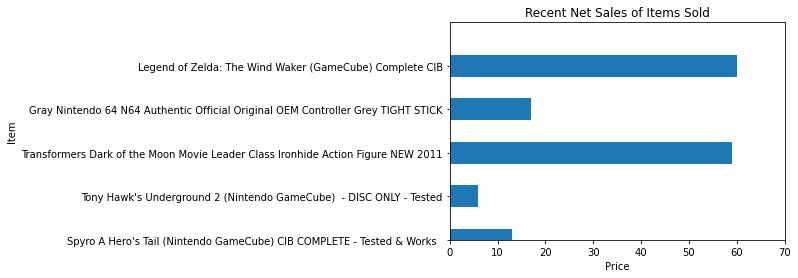

In [26]:
#Recent 5 items sold
df_ebay.plot(x='listingtitle', y='netsales', kind = 'barh', legend=False, title='Recent Net Sales of Items Sold')
plt.ylim(92,97 )
plt.xlim(0,70 )
plt.xlabel('Price')
plt.ylabel('Item')
plt.show()

In [28]:
total_sales = df_ebay.totalsales.sum()
total_net = df_ebay.netsales.sum()
total_cost = df_ebay.totalsellingcosts.sum()

print(total_sales)
print(total_net)
print(total_cost)

5319
3962
989


In [37]:
avg_net_sales = df_ebay.netsales.mean()
avg_shippingcost = df_ebay.yourshippingcost.mean()

print(avg_net_sales)
print(avg_shippingcost)

40.845360824742265
3.3195876288659796
